In [1]:
# data = 'https://www.kaggle.com/datasets/debashishsau/aslamerican-sign-language-aplhabet-dataset'

import os

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def create_dataframe(main_directory):
    
    df_list = []

    # Loops through each folder in main directory
    for folder_name in os.listdir(main_directory):
        folder_path = os.path.join(main_directory, folder_name)
        
        if os.path.isdir(folder_path):
            # Get all files in the folder
            files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
            
            # Create a DataFrame for the folder
            df_folder = pd.DataFrame({'Path': [os.path.join(folder_path, f) for f in files],
                                    'Label': [folder_name] * len(files)})
            
            # Append the DataFrame to the list
            df_list.append(df_folder)

    # Concatenate all DataFrames into a single DataFrame
    combined_df = pd.concat(df_list, ignore_index=True)
    
    return combined_df

In [3]:
df = create_dataframe('../data/asl_alphabet_train/')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191224 entries, 0 to 191223
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Path    191224 non-null  object
 1   Label   191224 non-null  object
dtypes: object(2)
memory usage: 2.9+ MB


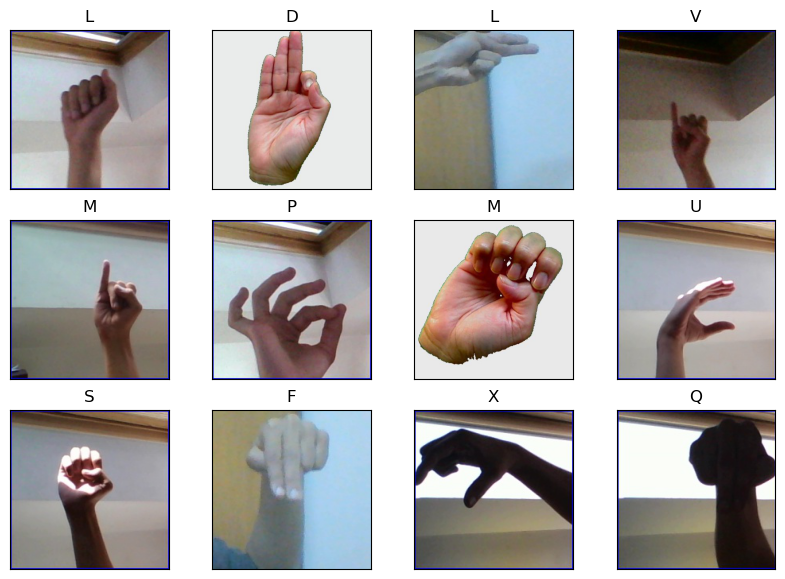

In [12]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(10, 7),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(df.sample(n=12, random_state=14)['Path'].iloc[i]))
    ax.set_title(df.sample(n=12, random_state=42)['Label'].iloc[i])

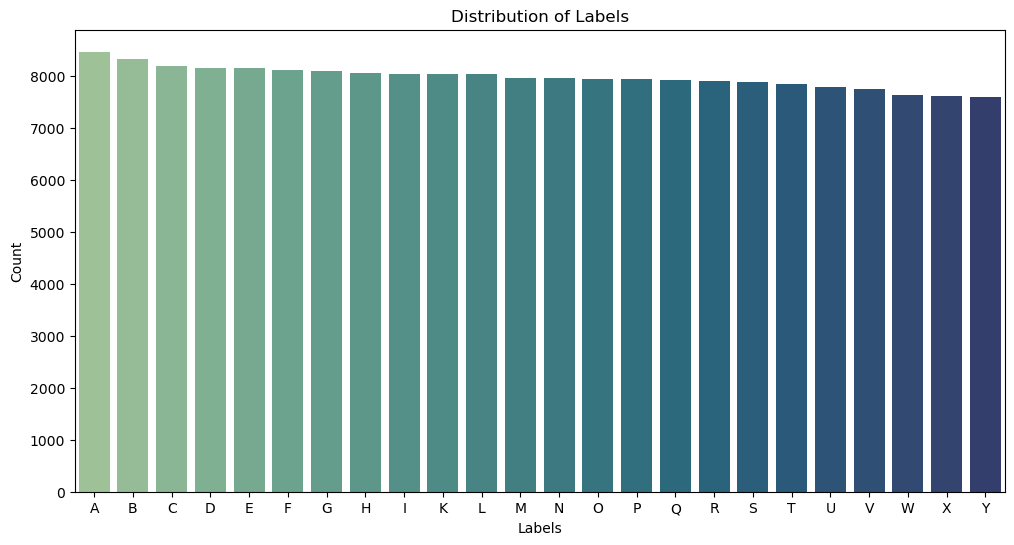

In [13]:
plt.figure(figsize=(12, 6))

sns.barplot(x=df['Label'].value_counts().sort_index().index, y=df['Label'].value_counts(), palette="crest")
plt.title('Distribution of Labels')
plt.xlabel('Labels')
plt.ylabel('Count')

plt.savefig('../images/distribution.png', bbox_inches='tight')